# 演练1.1

In [1]:
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from pathlib import Path
import pingouin as pg
from lets_plot import *

LetsPlot.setup_html(no_js=True)

## You don't need to use these settings yourself,
## they are just here to make the charts look nicer!
# Set the plot style for prettier charts:
plt.style.use(
    "https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt"
)

d:\python_Path\lib\site-packages\outdated\utils.py:18: OutdatedPackageWarning: The package pingouin is out of date. Your version is 0.5.3, the latest is 0.5.5.
Set the environment variable OUTDATED_IGNORE=1 to disable these warnings.
  **kwargs
Bad value in file 'https://raw.githubusercontent.com/aeturrell/core_python/main/plot_style.txt', line 24 ('legend.loc: "upper left"'): Key legend.loc: '"upper left"' is not a valid value for legend.loc; supported values are ['best', 'upper right', 'upper left', 'lower left', 'lower right', 'right', 'center left', 'center right', 'lower center', 'upper center', 'center']; remove quotes surrounding your string

In [2]:
df = pd.read_csv(
    "https://data.giss.nasa.gov/gistemp/tabledata_v4/NH.Ts+dSST.csv",
    skiprows=1,
    na_values="***",
)

In [3]:
df.head()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145 entries, 0 to 144
Data columns (total 19 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Year    145 non-null    int64  
 1   Jan     145 non-null    float64
 2   Feb     145 non-null    float64
 3   Mar     145 non-null    float64
 4   Apr     145 non-null    float64
 5   May     145 non-null    float64
 6   Jun     145 non-null    float64
 7   Jul     145 non-null    float64
 8   Aug     145 non-null    float64
 9   Sep     145 non-null    float64
 10  Oct     145 non-null    float64
 11  Nov     145 non-null    float64
 12  Dec     144 non-null    float64
 13  J-D     144 non-null    float64
 14  D-N     144 non-null    float64
 15  DJF     144 non-null    float64
 16  MAM     145 non-null    float64
 17  JJA     145 non-null    float64
 18  SON     145 non-null    float64
dtypes: float64(18), int64(1)
memory usage: 21.6 KB

温度异常是指相对于某个参考时期的平均温度的偏离情况。它是一种衡量当前温度与长期平均温度差值的方式，重点在于体现温度的变化情况，而不是实际的温度数值。温度异常有助于突出长期的温度变化趋势。对于研究气候变化这样的长期过程，关注温度相对于历史平均值的变化更有意义。它可以过滤掉一些短期的、局部的温度波动，让研究人员更准确地把握地球气候系统是在变暖还是变冷这样的宏观趋势。

## 演练1.2

绘制温度和时间折线图

In [5]:
df = df.set_index("Year")
df.head()

In [6]:
df.tail()

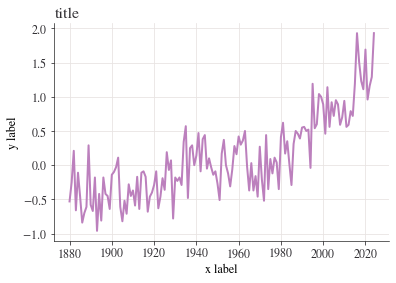

In [7]:

fig, ax = plt.subplots()

df["Feb"].plot(ax=ax)
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

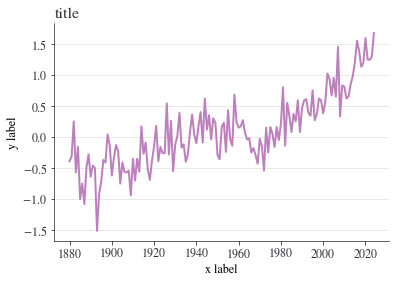

In [8]:
fig, ax = plt.subplots()
ax.plot(df.index, df["Jan"])
ax.set_ylabel("y label")
ax.set_xlabel("x label")
ax.set_title("title")
plt.show()

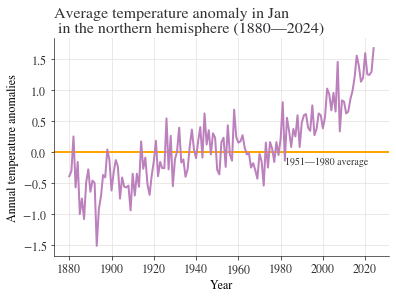

In [9]:
month = "Jan"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.66, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average temperature anomaly in {month} \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

问题 2 至 4
(a)中的图表对温度和时间之间的关系可以发现，在1880年到1930年之间，每年一月份的气温相比于1951-1980年平均气温要低，后续的关系呈正相关关系，即随着时间的增长气温也随之增长。

## 演练1.3

制作年气温异常的折线图

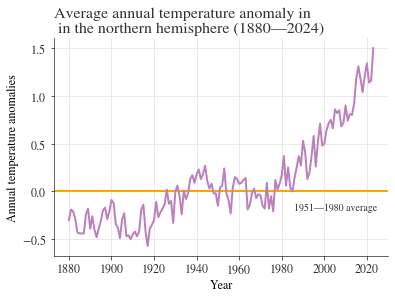

In [10]:
month = "J-D"
fig, ax = plt.subplots()
ax.axhline(0, color="orange")
ax.annotate("1951—1980 average", xy=(0.68, -0.2), xycoords=("figure fraction", "data"))
df[month].plot(ax=ax)
ax.set_title(
    f"Average annual temperature anomaly in \n in the northern hemisphere (1880—{df.index.max()})"
)
ax.set_ylabel("Annual temperature anomalies");

从上图的气温可以看出气温随着年份的增长而增长，尤其是近年来呈指数型增长，因此政府需要关注气候变化。

## 演练1.4

创建直方图和频率表

In [11]:
df["Period"] = pd.cut(
    df.index,
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)

In [12]:
df["Period"].tail(20)

Year
2005    1981—2010
2006    1981—2010
2007    1981—2010
2008    1981—2010
2009    1981—2010
2010    1981—2010
2011          NaN
2012          NaN
2013          NaN
2014          NaN
2015          NaN
2016          NaN
2017          NaN
2018          NaN
2019          NaN
2020          NaN
2021          NaN
2022          NaN
2023          NaN
2024          NaN
Name: Period, dtype: category
Categories (3, object): ['1921—1950' < '1951—1980' < '1981—2010']

In [13]:
list_of_months = ["Jun", "Jul", "Aug"]
df[list_of_months].stack().head()

Year     
1880  Jun   -0.18
      Jul   -0.22
      Aug   -0.25
1881  Jun   -0.34
      Jul    0.09
dtype: float64

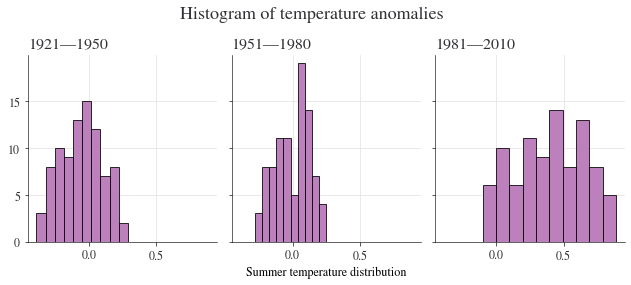

In [14]:
fig, axes = plt.subplots(ncols=3, figsize=(9, 4), sharex=True, sharey=True)
for ax, period in zip(axes, df["Period"].dropna().unique()):
    df.loc[df["Period"] == period, list_of_months].stack().hist(ax=ax)
    ax.set_title(period)
plt.suptitle("Histogram of temperature anomalies")
axes[1].set_xlabel("Summer temperature distribution")
plt.tight_layout();

## 演练1.5

In [15]:
temp_all_months = df.loc[(df.index >= 1951) & (df.index <= 1980), "Jan":"Dec"]
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
temp_all_months

360 rows × 3 columns

In [16]:
quantiles = [0.3, 0.7]
list_of_percentiles = np.quantile(temp_all_months["values"], q=quantiles)

print(f"The cold threshold of {quantiles[0]*100}% is {list_of_percentiles[0]}")
print(f"The hot threshold of {quantiles[1]*100}% is {list_of_percentiles[1]}")

The cold threshold of 30.0% is -0.1
The hot threshold of 70.0% is 0.1

根据上述的表格信息和结果输出，我们在这段时间内更频繁地经历更热的天气。

## 演练1.6

In [17]:
# Create a variable that has years 1981 to 2010, and months Jan to Dec (inclusive)
temp_all_months = df.loc[(df.index >= 1981) & (df.index <= 2010), "Jan":"Dec"]
# Put all the data in stacked format and give the new columns sensible names
temp_all_months = (
    temp_all_months.stack()
    .reset_index()
    .rename(columns={"level_1": "month", 0: "values"})
)
# Take a look at the start of this data data:
temp_all_months.head()

In [18]:
entries_less_than_q30 = temp_all_months["values"] < list_of_percentiles[0]
proportion_under_q30 = entries_less_than_q30.mean()
print(
    f"The proportion under {list_of_percentiles[0]} is {proportion_under_q30*100:.2f}%"
)

The proportion under -0.1 is 1.94%

In [19]:
proportion_over_q70 = (temp_all_months["values"] > list_of_percentiles[1]).mean()
print(f"The proportion over {list_of_percentiles[1]} is {proportion_over_q70*100:.2f}%")

The proportion over 0.1 is 84.72%

## 演练1.7

In [20]:
temp_all_months = (
    df.loc[:, "DJF":"SON"]
    .stack()
    .reset_index()
    .rename(columns={"level_1": "Season", 0: "Values"})
)
temp_all_months["Period"] = pd.cut(
    temp_all_months["Year"],
    bins=[1921, 1950, 1980, 2010],
    labels=["1921—1950", "1951—1980", "1981—2010"],
    ordered=True,
)
# Take a look at a cut of the data using `.iloc`, which provides position
temp_all_months.iloc[-135:-125]

In [21]:
grp_mean_var = temp_all_months.groupby(["Season", "Period"])["Values"].agg(
    [np.mean, np.var]
)
grp_mean_var

In [22]:
min_year = 1880
(
    ggplot(temp_all_months, aes(x="Year", y="Values", color="Season"))
    + geom_abline(slope=0, color="black", size=1)
    + geom_line(size=1)
    + labs(
        title=f"Average annual temperature anomaly in \n in the northern hemisphere ({min_year}—{temp_all_months['Year'].max()})",
        y="Annual temperature anomalies",
    )
    + scale_x_continuous(format="d")
    + geom_text(
        x=min_year, y=0.1, label="1951—1980 average", hjust="left", color="black"
    )
)

<path d="M20.42799408177234 209.58556149732618 L20.42799408177234 209.58556149732618 L23.265215482018903 191.35655866624722 L26.102436882265465 206.70729789241898 L28.939658282511118 212.4638251022334 L31.77687968275768 241.24646115130543 L34.614101083003334 232.6116703365838 L37.451322483249896 235.48993394149102 L40.28854388349646 224.93630072349794 L43.12576528374211 223.01745832022647 L45.962986683988674 187.51887385970429 L48.80020808423524 224.93630072349794 L51.63742948448089 211.50440390059765 L54.47465088472745 233.57109153821955 L57.311872284973106 223.9768795218622 L60.14909368521967 223.01745832022647 L62.98631508546623 222.05803711859073 L65.82353648571188 230.69282793331234 L68.66075788595845 200.95077068260457 L71.4979792862041 234.53051273985528 L74.33520068645066 223.9768795218622 L77.17242208669722 193.2754010695187 L80.00964348694288 181.76234664988988 L82.84686488718944 226.8551431267694 L85.684086287436 224.93630072349794 L88.52130768768166 235.48993394149102 L91.35852908792822 221.098615916955 L94.19575048817387 202.86961308587604 L97.03297188842043 231.65224913494808 L99.870193288667 237.4087763447625 L102.70741468891265 248.9218307643913 L105.54463608915921 229.7334067316766 L108.38185748940577 239.32761874803396 L111.21907888965143 218.2203523120478 L114.05630028989799 239.32761874803396 L116.89352169014364 220.13919471531926 L119.7307430903902 196.1536646744259 L122.56796449063677 225.89572192513367 L125.40518589088242 257.5566215791129 L128.24240729112898 232.6116703365838 L131.07962869137464 223.01745832022647 L133.9168500916212 203.82903428751177 L136.75407149186776 206.70729789241898 L139.59129289211342 203.82903428751177 L142.42851429235998 231.65224913494808 L145.26573569260654 199.99134948096884 L148.1029570928522 209.58556149732618 L150.94017849309876 189.43771626297575 L153.7773998933444 218.2203523120478 L156.61462129359097 212.4638251022334 L159.45184269383753 215.3420887071406 L162.2890640940832 197.11308587606163 L165.12628549432975 202.86961308587604 L167.9635068945754 197.11308587606163 L170.80072829482197 213.42324630386912 L173.63794969506853 204.7884554891475 L176.47517109531418 208.62614029569045 L179.31239249556074 195.19424347279016 L182.1496138958073 195.19424347279016 L184.98683529605296 168.3304498269896 L187.82405669629952 199.99134948096884 L190.66127809654517 175.04639823843974 L193.49849949679174 174.086977036804 L196.3357208970383 181.76234664988988 L199.17294229728395 173.12755583516827 L202.01016369753052 166.41160742371812 L204.84738509777617 175.04639823843974 L207.68460649802273 175.04639823843974 L210.5218278982693 171.2087134318968 L213.35904929851495 194.23482227115443 L216.1962706987615 189.43771626297575 L219.03349209900807 197.11308587606163 L221.87071349925372 188.47829506134002 L224.7079348995003 187.51887385970429 L227.54515629974594 161.61450141553945 L230.3823776999925 198.07250707769737 L233.21959910023907 216.30150990877632 L236.05682050048472 215.3420887071406 L238.89404190073128 198.07250707769737 L241.73126330097693 180.80292544825414 L244.5684847012235 171.2087134318968 L247.40570610147006 205.74787669078324 L250.2429275017157 176.9652406417112 L253.08014890196227 173.12755583516827 L255.91737030220884 194.23482227115443 L258.7545917024545 213.42324630386912 L261.59181310270105 205.74787669078324 L264.4290345029467 199.0319282793331 L267.26625590319327 175.04639823843974 L270.10347730343983 178.88408304498267 L272.9406987036855 192.31597986788296 L275.77792010393205 193.2754010695187 L278.6151415041786 209.58556149732618 L281.45236290442426 199.0319282793331 L284.2895843046708 171.2087134318968 L287.1268057049165 199.0319282793331 L289.96402710516304 185.60003145643282 L292.8012485054096 207.6667190940547 L295.63846990565526 166.41160742371812 L298.4756913059018 182.7217678515256 L301.3129127061475 189.43771626297575 L304.15013410639403 175.04639823843974 L306.9873555066406 150.10144699591063 L309.82457690688625 179.8435042466184 L312.6617983071328 17

## 演练1.8

In [24]:
df_co2 = pd.read_excel("data_co2.xlsx")
df_co2.head()

In [25]:
df_co2_june = df_co2.loc[df_co2["Month"] == 6]
df_co2_june.head()

In [26]:
df_temp_co2 = pd.merge(df_co2_june, df, on="Year")
df_temp_co2[["Year", "Jun", "Trend"]].head()

In [27]:
(
    ggplot(df_temp_co2, aes(x="Jun", y="Trend"))
    + geom_point(color="black", size=3)
    + labs(
        title="Scatterplot of temperature anomalies vs carbon dioxide emissions",
        y="Carbon dioxide levels (trend, mole fraction)",
        x="Temperature anomaly (degrees Celsius)",
    )
)

-0.2 
 
 
 
 
 
 
 
 
 0.0 
 
 
 
 
 
 
 
 
 0.2 
 
 
 
 
 
 
 
 
 0.4 
 
 
 
 
 
 
 
 
 0.6 
 
 
 
 
 
 
 
 
 0.8 
 
 
 
 
 
 
 
 
 1.0 
 
 
 
 
 
 
 
 
 
 
 320 
 
 
 
 
 
 
 340 
 
 
 
 
 
 
 360 
 
 
 
 
 
 
 380 
 
 
 
 
 
 
 400 
 
 
 
 
 
 
 
 Scatterplot of temperature anomalies vs carbon dioxide emissions 
 
 
 
 
 Carbon dioxide levels (trend, mole fraction) 
 
 
 
 
 Temperature anomaly (degrees Celsius)

In [28]:
df_temp_co2[["Jun", "Trend"]].corr(method="pearson")

In [29]:
(
    ggplot(df_temp_co2, aes(x="Year", y="Jun"))
    + geom_line(size=1)
    + labs(
        title="June temperature anomalies",
    )
    + scale_x_continuous(format="d")
)

<path d="M24.04475878746598 251.55604921394396 L24.04475878746598 251.55604921394396 L32.19552447813294 231.80895420369103 L40.3462901687999 223.03246753246754 L48.497055859465036 223.03246753246754 L56.647821550131994 291.05023923444975 L64.79858724079895 271.30314422419684 L72.94935293146591 282.27375256322625 L81.10011862213105 306.40909090909093 L89.25088431279801 249.36192754613808 L97.40165000346497 275.6913875598086 L105.5524156941301 273.49726589200276 L113.70318138479706 271.30314422419684 L121.85394707546402 258.13841421736157 L130.00471276612916 293.24436090225566 L138.15547845679612 284.4678742310321 L146.30624414746308 227.42071086807928 L154.45700983812822 302.02084757347916 L162.60777552879517 280.0796308954204 L170.75854121946213 306.40909090909093 L178.9093069101291 212.06185919343812 L187.06007260079423 293.24436090225566 L195.2108382914612 244.97368421052633 L203.36160398212814 220.83834586466165 L211.51236967279328 201.09125085440874 L219.66313536346024 260.3325358851675 L227.8139010541272 238.3913192071087 L235.96466674479234 242.77956254272044 L244.1154324354593 260.3325358851675 L252.26619812612626 231.80895420369103 L260.4169638167932 225.2265892002734 L268.56772950745835 174.7617908407382 L276.7184951981253 209.86773752563226 L284.86926088879227 157.20881749829118 L293.0200265794574 159.40293916609704 L301.17079227012437 253.75017088174982 L309.3215579607913 214.255980861244 L317.47232365145646 172.5676691729323 L325.6230893421234 152.8205741626794 L333.7738550327904 207.67361585782638 L341.9246207234555 155.0146958304853 L350.0753864141225 102.35577580314421 L358.22615210478943 185.73239917976758 L366.3769177954564 165.98530416951468 L374.52768348612153 148.43233082706766 L382.6784491767885 113.3263841421736 L390.82921486745545 144.0440874914559 L398.9799805581206 159.40293916609704 L407.13074624878755 91.38516746411483 L415.2815119394545 84.80280246069717 L423.43227763011964 119.90874914559123 L431.5830433207866 126.49111414900887 L439.73380901145356 115.52050580997948 L447.8845747021205 78.22043745727956 L456.03534039278566 95.77341079972658 L464.1861060834508 56.279220779220765 L472.3368717741196 91.38516746411483 L480.4876374647847 84.80280246069717 L488.6384031554535 29.949760765550224 L496.7891688461186 14.590909090909093 L504.93993453678377 58.473342447026624 " fill="none" stroke-width="2.2" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 
 
 
 
 
 
 1960 
 
 
 
 
 
 
 
 
 1970 
 
 
 
 
 
 
 
 
 1980 
 
 
 
 
 
 
 
 
 1990 
 
 
 
 
 
 
 
 
 2000 
 
 
 
 
 
 
 
 
 2010 
 
 
 
 
 
 
 
 
 
 
 -0.2 
 
 
 
 
 
 
 0.0 
 
 
 
 
 
 
 0.2 
 
 
 
 
 
 
 0.4 
 
 
 
 
 
 
 0.6 
 
 
 
 
 
 
 0.8 
 
 
 
 
 
 
 1.0 
 
 
 
 
 
 
 
 June temperature anomalies 
 
 
 
 
 Jun 
 
 
 
 
 Year

In [30]:
base_plot = ggplot(df_temp_co2) + scale_x_continuous(format="d")
plot_p = (
    base_plot
    + geom_line(aes(x="Year", y="Jun"), size=1)
    + labs(title="June temperature anomalies")
)
plot_q = (
    base_plot
    + geom_line(aes(x="Year", y="Trend"), size=1)
    + labs(title="Carbon dioxide emissions")
)
gggrid([plot_p, plot_q], ncol=2)

<path d="M17.13566787837408 251.55604921394396 L17.13566787837408 251.55604921394396 L22.944368854094137 231.80895420369103 L28.753069829816013 223.03246753246754 L34.56177080553607 223.03246753246754 L40.37047178125613 291.05023923444975 L46.179172756976186 271.30314422419684 L51.987873732696244 282.27375256322625 L57.7965747084163 306.40909090909093 L63.60527568413636 249.36192754613808 L69.41397665985824 275.6913875598086 L75.2226776355783 273.49726589200276 L81.03137861129835 271.30314422419684 L86.84007958701841 258.13841421736157 L92.64878056273847 293.24436090225566 L98.45748153845852 284.4678742310321 L104.2661825141804 227.42071086807928 L110.07488348990046 302.02084757347916 L115.88358446562052 280.0796308954204 L121.69228544134057 306.40909090909093 L127.50098641706063 212.06185919343812 L133.3096873927807 293.24436090225566 L139.11838836850075 244.97368421052633 L144.92708934422262 220.83834586466165 L150.73579031994268 201.09125085440874 L156.54449129566274 260.3325358851675 L162.3531922713828 238.3913192071087 L168.16189324710285 242.77956254272044 L173.9705942228229 260.3325358851675 L179.77929519854297 231.80895420369103 L185.58799617426484 225.2265892002734 L191.3966971499849 174.7617908407382 L197.20539812570496 209.86773752563226 L203.01409910142502 157.20881749829118 L208.82280007714508 159.40293916609704 L214.63150105286513 253.75017088174982 L220.440202028587 214.255980861244 L226.24890300430707 172.5676691729323 L232.05760398002712 152.8205741626794 L237.86630495574718 207.67361585782638 L243.67500593146724 155.0146958304853 L249.4837069071873 102.35577580314421 L255.29240788290736 185.73239917976758 L261.10110885862923 165.98530416951468 L266.9098098343493 148.43233082706766 L272.71851081006935 113.3263841421736 L278.5272117857894 144.0440874914559 L284.33591276150946 159.40293916609704 L290.1446137372295 91.38516746411483 L295.9533147129514 84.80280246069717 L301.76201568867145 119.90874914559123 L307.5707166643915 126.49111414900887 L313.37941764011157 115.52050580997948 L319.1881186158316 78.22043745727956 L324.9968195915517 95.77341079972658 L330.80552056727174 56.279220779220765 L336.6142215429936 91.38516746411483 L342.4229225187137 84.80280246069717 L348.23162349443373 29.949760765550224 L354.0403244701538 14.590909090909093 L359.84902544587385 58.473342447026624 " fill="none" stroke-width="2.2" stroke="rgb(71,71,71)" stroke-opacity="1.0">
 
 
 
 
 
 
 
 
 
 1960 
 
 
 
 
 
 
 
 
 1970 
 
 
 
 
 
 
 
 
 1980 
 
 
 
 
 
 
 
 
 1990 
 
 
 
 
 
 
 
 
 2000 
 
 
 
 
 
 
 
 
 2010 
 
 
 
 
 
 
 
 
 
 
 -0.2 
 
 
 
 
 
 
 0.0 
 
 
 
 
 
 
 0.2 
 
 
 
 
 
 
 0.4 
 
 
 
 
 
 
 0.6 
 
 
 
 
 
 
 0.8 
 
 
 
 
 
 
 1.0 
 
 
 
 
 
 
 
 June temperature anomalies 
 
 
 
 
 Jun 
 
 
 
 
 Year 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 
 <path d="M17.366281074255312 306.4090909090909 L17.366281074255312 306.4090909090909 L23.253156014679917 303.0032722513089 L29.14003095510634 298.4197405997144 L35.026905895530945 298.03777962874824 L40.91378083595555 295.5232032365541 L46.80065577638197 292.69032603522123 L52.68753071680658 291.00333174678724 L58.57440565723118 291.1306520704427 L64.4612805976576 285.17842693955265 L70.34815553808221 283.8415635411709 L76.23503047850681 279.83097334602576 L82.12190541893324 275.279271775345 L88.00878035935784 272.4463945740124 L93.89565529978245 269.64534745359356 L99.78253024020887 267.99018324607323 L105.66940518063348 258.3774988100904 L111.55628012105808 258.3774988100904 L117.4431550614845 254.36690861494526 L123.33003000190911 252.93455497382206 L129.2169049423337 246.09108757734407 L135.10377988275832 240.39350309376505 L140.99065482318474 236.41474297953368 L146.87752976360935 230.0487267967635 L152.76440470403395 226.13362684435992 L158.65127964446037 222.05937648738677 L164.53815458488498 216.32996192289397 L170.42502952530958 212.00107091861014 L176.311904465736 207.44936934792963 L182.1987794061606 202.4202165635

从上述图标可以看出，年份与CO_2的关系呈正相关关系，同时业余气温变化呈正相关关系，而且从它们的变化曲线可以看出均呈指数型增长，因此气温变化异常与二氧化碳有关系。